In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy.optimize import fmin_tnc
import scipy.optimize as op
from sklearn import metrics
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
plt.style.use("Solarize_Light2")
import random
np.random.seed(9)
np.set_printoptions(suppress=True)
import math
import warnings
warnings.filterwarnings('ignore')

In [2]:
loan_data_new = pd.read_csv("loan_data_new.csv")
loan_data_new

,Unnamed: 0,Gender_Female,Gender_Male,Gender_No Gender,Married_No,Married_Yes,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,...,Credit_History_1.0,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Dependents,LoanAmount,Loan_Amount_Term,ApplicantIncome,CoapplicantIncome,Loan_Status
0,0,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,128.0,360,5849,0.0,1
1,1,0,1,0,0,1,1,0,1,0,...,1,1,0,0,1,128.0,360,4583,1508.0,0
2,2,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,66.0,360,3000,0.0,1
3,3,0,1,0,0,1,0,1,1,0,...,1,0,0,1,0,120.0,360,2583,2358.0,1
4,4,0,1,0,1,0,1,0,1,0,...,1,0,0,1,0,141.0,360,6000,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,1,0,0,1,0,1,0,1,0,...,1,1,0,0,0,71.0,360,2900,0.0,1
610,610,0,1,0,0,1,1,0,1,0,...,1,1,0,0,3,40.0,180,4106,0.0,1
611,611,0,1,0,0,1,1,0,1,0,...,1,0,0,1,1,253.0,360,8072,240.0,1
612,612,0,1,0,0,1,1,0,1,0,...,1,0,0,1,2,187.0,360,7583,0.0,1


In [3]:
loan_data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               614 non-null    int64  
 1   Gender_Female            614 non-null    int64  
 2   Gender_Male              614 non-null    int64  
 3   Gender_No Gender         614 non-null    int64  
 4   Married_No               614 non-null    int64  
 5   Married_Yes              614 non-null    int64  
 6   Education_Graduate       614 non-null    int64  
 7   Education_Not Graduate   614 non-null    int64  
 8   Self_Employed_No         614 non-null    int64  
 9   Self_Employed_Yes        614 non-null    int64  
 10  Credit_History_0.0       614 non-null    int64  
 11  Credit_History_1.0       614 non-null    int64  
 12  Property_Area_Rural      614 non-null    int64  
 13  Property_Area_Semiurban  614 non-null    int64  
 14  Property_Area_Urban      6

In [4]:
X = loan_data_new.drop("Loan_Status", 1)
y = loan_data_new.iloc[:, -1].to_numpy()

In [5]:
def normalize(X):
    max_value = X.max()
    min_value = X.min()
    sub_value = max_value - min_value
    if(sub_value == 0):
        return 0
    return np.divide(np.subtract(X,min_value),sub_value)

In [6]:
numerical_columns = ["Dependents", "LoanAmount", "Loan_Amount_Term", "ApplicantIncome", "CoapplicantIncome"]
for col in numerical_columns:
    X[col] = normalize(X[col])

In [7]:
def transform_x_y(xx, yy):
    xx = np.c_[np.ones((xx.shape[0], 1)), xx]
    yy = yy[:, np.newaxis]
    m,n = np.shape(xx)
    one_vec = np.ones((m,1))
    xx = np.hstack((one_vec,xx))
    theta = np.zeros((n+1,1))
    return xx, yy, theta

In [21]:
def h(z): # Activation function used to map any real value between 0 and 1
    z = z.astype(float)
    return (1 / (1 + np.exp(-z)))

def probability(theta, x): # Returns the probability after passing through sigmoid
    return h(np.dot(x, theta))

def cost_function(theta, x, y): # Computes the cost function for all the training samples
    m = x.shape[0]
    total_cost = -(1 / m) * np.sum(y * np.log(probability(theta, x)) + (1 - y) * np.log(1 - probability(theta, x)))
    #print("total_cost = ", total_cost)
    return total_cost

def gradient(theta, x, y): # Computes the gradient of the cost function at the point theta
    m = x.shape[0]
    return (1 / m) * np.dot(x.T, h(np.dot(x, theta)) - y)

def gd_fit(x, y, theta):
    opt_weights = fmin_tnc(func=cost_function, x0=theta, fprime=gradient, approx_grad=True, args=(x, y.flatten()))
    return opt_weights[0]

In [22]:
def predict_gd(x, gd_parameters):
    theta = gd_parameters[:, np.newaxis]
    return probability(theta, x)
def accuracy_gd(x, actual_classes, gd_parameters, probab_threshold=0.5):
    predicted_classes = (predict_gd(x, gd_parameters) >= probab_threshold).astype(int)
    predicted_classes = predicted_classes.flatten()
    accuracy = np.mean(predicted_classes == actual_classes)
    return accuracy * 100, predicted_classes

In [23]:
gd_x_train, gd_x_test, gd_y_train, gd_y_test = train_test_split(X, y, test_size=0.25, random_state=0)
gd_x_train,  gd_y_train, theta = transform_x_y(gd_x_train, gd_y_train)
gd_parameters = gd_fit(gd_x_train, gd_y_train, theta)
print(gd_parameters)
gd_x_test,  gd_y_test, theta = transform_x_y(gd_x_test, gd_y_test)
gradient_descent_accuracy_2, gd_y_pred = accuracy_gd(gd_x_test, gd_y_test.flatten(), gd_parameters)
print("Accuracy using Gradient Descent after spliting dataset= ", gradient_descent_accuracy_2, "%")

total_cost =  0.6931471805599452
total_cost =  0.6931471787990757
total_cost =  0.6931471787990757
total_cost =  0.6931466426484583
total_cost =  0.6931471802338584
total_cost =  0.6931471791360322
total_cost =  0.6931471805490758
total_cost =  0.6931471801360322
total_cost =  0.6931471792229887
total_cost =  0.6931471789947278
total_cost =  0.6931471803642931
total_cost =  0.6931471790382061
total_cost =  0.6931471803208149
total_cost =  0.6931471811903801
total_cost =  0.6931471781686409
total_cost =  0.693147180266467
total_cost =  0.6931471796142932
total_cost =  0.6931471800382062
total_cost =  0.6931471800635685
total_cost =  0.6931471802279596
total_cost =  0.6931471793409747
total_cost =  0.6931471804449972
total_cost =  0.6931471805129925
total_cost =  0.693146378976723
total_cost =  0.6931463772158648
total_cost =  0.6931463772158648
total_cost =  0.6931458410698744
total_cost =  0.6931463786506382
total_cost =  0.6931463775528189
total_cost =  0.6931463789658537
total_cost =

              precision    recall  f1-score   support

           0       0.90      0.44      0.59        43
           1       0.82      0.98      0.89       111

    accuracy                           0.83       154
   macro avg       0.86      0.71      0.74       154
weighted avg       0.84      0.83      0.81       154



<AxesSubplot:>

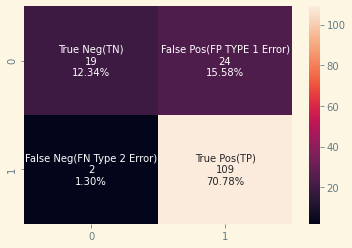

In [17]:
gd_y_test = list(gd_y_test.flatten())
gd_y_pred = list(gd_y_pred)
print(classification_report(gd_y_test,gd_y_pred))
gd_cf_matrix = metrics.confusion_matrix(gd_y_test, gd_y_pred)
group_names = ['True Neg(TN)', 'False Pos(FP TYPE 1 Error)', 'False Neg(FN Type 2 Error)', 'True Pos(TP)']
group_counts = ["{0:0.0f}".format(value) for value in gd_cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in gd_cf_matrix.flatten()/np.sum(gd_cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
import seaborn as sns
sns.heatmap(gd_cf_matrix, annot=labels, fmt='')